In [7]:
import pandas as pd
import numpy as np
import csv
import datetime as dt
from pmaw import PushshiftAPI
import matplotlib.pyplot as plt

In [2]:
api = PushshiftAPI()


In [18]:
before = int(dt.datetime(2022,12,31,0,0).timestamp())
after = int(dt.datetime(2022,9,1,0,0).timestamp())

In [19]:
subreddit="UCSC"
limit=200
comments = api.search_comments(subreddit=subreddit, limit=limit, before=before, after=after)
print(f'Retrieved {len(comments)} comments from Pushshift')


Retrieved 200 comments from Pushshift


In [20]:
comments_df = pd.DataFrame(comments)
comments_df.head(5)

,subreddit_id,author_is_blocked,comment_type,edited,author_flair_type,total_awards_received,subreddit,author_flair_template_id,id,gilded,...,subreddit_name_prefixed,controversiality,author_flair_background_color,collapsed_because_crowd_control,distinguished,retrieved_utc,updated_utc,body_sha1,utc_datetime_str,nest_level
0,t5_2r3oq,False,None,False,text,0,UCSC,None,j2ctolk,0,...,r/UCSC,0,None,None,None,1672473461,1672473462,91729ca7d852e9e96253ee09be7918341ab9eeca,2022-12-31 07:57:29,NaN
1,t5_2r3oq,False,None,False,text,0,UCSC,None,j2csz7t,0,...,r/UCSC,0,None,None,None,1672472924,1672472925,768f4baca5f65edb5c9dfa2704d5210503861603,2022-12-31 07:48:33,NaN
2,t5_2r3oq,False,None,False,text,0,UCSC,None,j2cp608,0,...,r/UCSC,0,None,None,None,1672470103,1672470104,4db33ae79a7a8da1a03abb73cd30cb0194a3031f,2022-12-31 07:01:27,1.0
3,t5_2r3oq,False,None,False,richtext,0,UCSC,4ff1ada6-2b4a-11e4-8b10-12313d09698f,j2cl9zg,0,...,r/UCSC,0,None,None,None,1672467453,1672467454,fffbdde2fb8e9a01f61c9f89c98095ebfab67734,2022-12-31 06:17:19,1.0
4,t5_2r3oq,False,None,False,text,0,UCSC,None,j2cjlx7,0,...,r/UCSC,0,None,None,None,1672466384,1672466385,15c68ec16091ae93e53a8e61630cbcb22cd94513,2022-12-31 05:59:31,1.0


In [21]:
comments_df.to_csv('./UCSC_commecnts.csv', header=True, index=False, columns=list(comments_df.axes[1]))

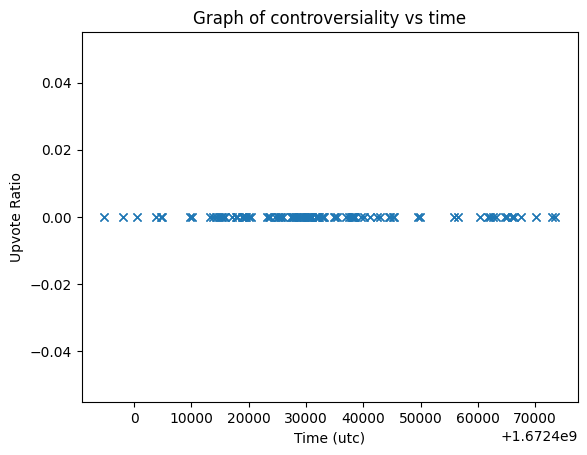

In [24]:
# take times, graph submissions posted during those times
times = comments_df.loc[:, "updated_utc"]
time_display_form = comments_df.loc[:, "utc_datetime_str"]
metric = "controversiality"
data = comments_df.loc[:, metric]

plt.figure("Graph of "+metric+" vs time")
plt.plot(times, data, "x")
plt.ylabel("Upvote Ratio")
plt.xlabel("Time (utc)")
plt.title("Graph of "+metric+" vs time")
plt.show()

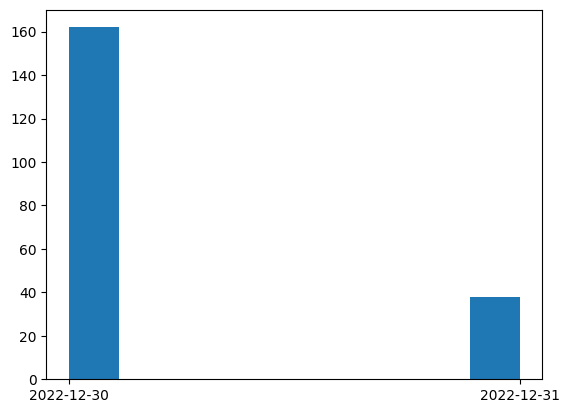

In [51]:
# plot activity over multiple days
dates = [time_display_form[len(time_display_form) - i -1][:10] for i in range(len(time_display_form))]
plt.hist(dates, bins="auto")
plt.show()

# print(time_display_form[0][10:13])

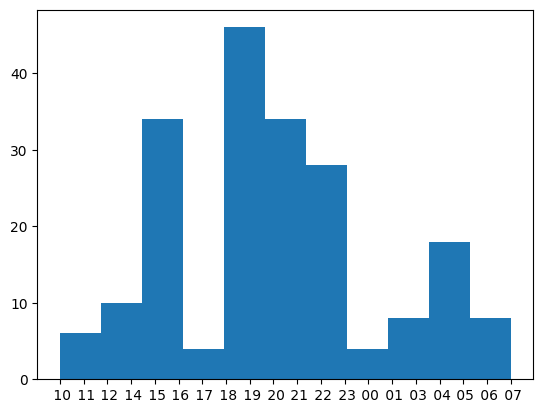

In [49]:
# plot post activity over a day
hour_time = [time_display_form[len(time_display_form) - i -1][10:13] for i in range(len(time_display_form))] # get only hour from timestamp
plt.hist(hour_time, bins="auto") # display histogram of data
plt.show()